<a href="https://colab.research.google.com/github/fatimaAfzaal/Multiple-Ensemble-models-Diabetes-Prediction-Project-/blob/main/MultipleEnsembleModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Project Using Ensemble models


## STEP 1:
### Problem definition
We have to define the problem and set goal that we we have to do

## STEP 2:
### Data Collection and Exploration
This is the step where we have to collect the data required. As in our project we get the dataset from kaggle(https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

Also in this step we will explore data to get insight and use visualizations as well if needed to understand data

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')            # Mount Google Drive to access data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Data Collection

In [23]:
pip install catboost


In [24]:
import pandas as pd                                                        #for data manipulation
import numpy as np                                                         #for numerical operations
from matplotlib import pyplot as plt                                       #for visualization
import seaborn as sns                                                      #for visualization

from sklearn.ensemble import RandomForestClassifier                        #for using Random forest Classifier algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.metrics import accuracy_score                                 #for accouracy

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/'+"diabetess.csv") #Read a CSV file by given path



df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Exploration

In [25]:
print('Total number of records: ',len(df))                # For checking number of records

Total number of records:  768


In [26]:
print("Parameter are: ",df.columns)                     #For printing coloumn names

Parameter are:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [27]:
df.info()                           #Get insight about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
df['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

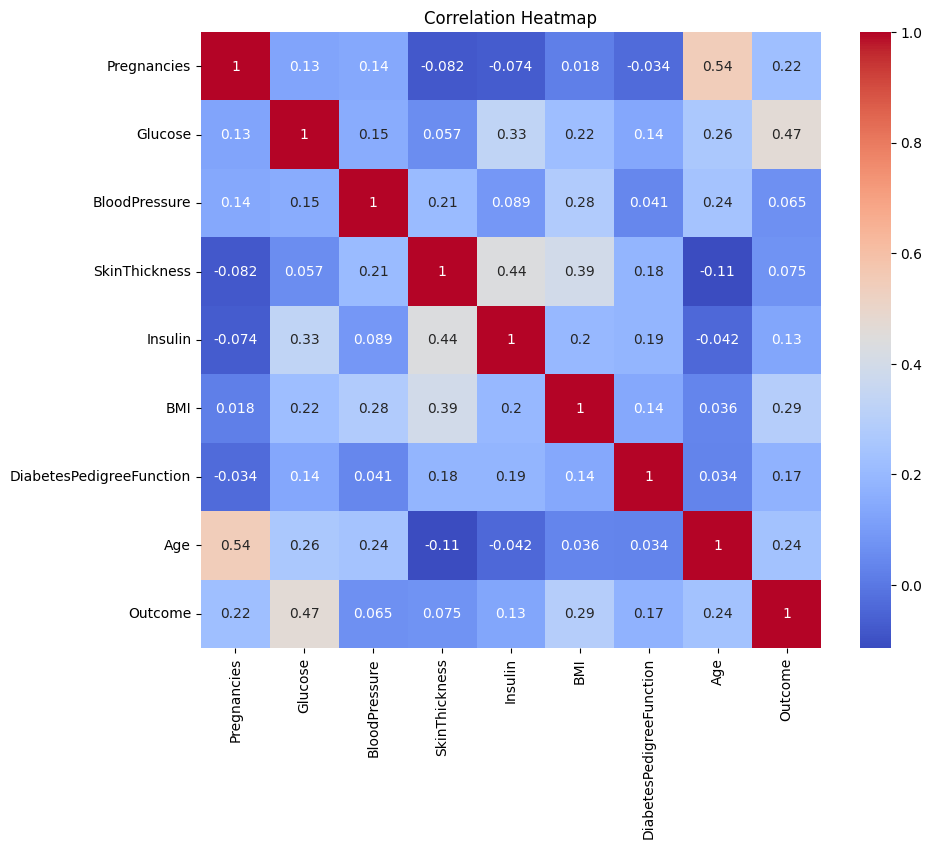

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## STEP 3:
### Data Preprocessing
In this step we will perform task as handling missing values and encode catagorical data



### Handling missing values

In [31]:
df.isnull().values.any()

False

In [32]:
true_count= len(df.loc[df['Outcome']==True])
False_count= len(df.loc[df['Outcome']==False])
(true_count,False_count)

(268, 500)

### Finding Correlation between Attributes

In [33]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

# Data spliting
In this step we will split data in to testing and training data

In [34]:
from sklearn.model_selection import train_test_split
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = df['Outcome']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

# Model Selection and Model Training
Firstly we will select the right algorithm according to our requirement and then we will train data on model

In [36]:
n_estimators = 10


base_models = []
base_models_ab = []
base_models_gb = []
base_models_bagging = []
base_models_extra_trees = []
base_models_xgboost = []


In [37]:
#Random Forest
for i in range(n_estimators):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, Y_train)
    base_models.append(rf)

# Create and train AdaBoost models
for i in range(n_estimators):
    ab = AdaBoostClassifier(n_estimators=100)
    ab.fit(X_train, Y_train)
    base_models_ab.append(ab)

# Create and train Gradient Boosting models
for i in range(n_estimators):
    gb = GradientBoostingClassifier(n_estimators=100)
    gb.fit(X_train, Y_train)
    base_models_gb.append(gb)

# Create and train Bagging models
for i in range(n_estimators):
    bagging = BaggingClassifier(n_estimators=100)
    bagging.fit(X_train, Y_train)
    base_models_bagging.append(bagging)

# Create and train Extra Trees models
for i in range(n_estimators):
    extra_trees = ExtraTreesClassifier(n_estimators=100)
    extra_trees.fit(X_train, Y_train)
    base_models_extra_trees.append(extra_trees)

# Create and train XGBoost models
for i in range(n_estimators):
    xgboost = XGBClassifier(n_estimators=100)
    xgboost.fit(X_train, Y_train)
    base_models_xgboost.append(xgboost)

# Create and train Voting Classifier models
voting_classifier = VotingClassifier(estimators=[
    ('rf', base_models[0]),
    ('ab', base_models_ab[0]),
    ('gb', base_models_gb[0]),
], voting='soft')
voting_classifier.fit(X_train, Y_train)


# Create and train Stacking Classifier models
stacking_classifier = StackingClassifier(estimators=[
    ('rf', base_models[0]),
    ('ab', base_models_ab[0]),
    ('gb', base_models_gb[0]),
], final_estimator=LogisticRegression())
stacking_classifier.fit(X_train, Y_train)

#CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100,  # Number of boosting iterations (adjust as needed)
                                    learning_rate=0.1,  # Learning rate (adjust as needed)
                                    depth=6,  # Depth of the trees (adjust as needed)
                                    random_state=42)  # Random seed for reproducibility

catboost_model.fit(X_train, Y_train)

#PassiveAggressiveClassifier
pa_classifier = PassiveAggressiveClassifier(C=1.0, random_state=42)
pa_classifier.fit(X_train, Y_train)


0:	learn: 0.6696660	total: 3.57ms	remaining: 354ms
1:	learn: 0.6439327	total: 10.4ms	remaining: 508ms
2:	learn: 0.6231656	total: 12.7ms	remaining: 410ms
3:	learn: 0.6046479	total: 16.6ms	remaining: 399ms
4:	learn: 0.5880920	total: 20.2ms	remaining: 384ms
5:	learn: 0.5754677	total: 22.4ms	remaining: 351ms
6:	learn: 0.5629351	total: 24.3ms	remaining: 322ms
7:	learn: 0.5523935	total: 26.1ms	remaining: 300ms
8:	learn: 0.5415695	total: 27.9ms	remaining: 282ms
9:	learn: 0.5319848	total: 29.7ms	remaining: 268ms
10:	learn: 0.5223657	total: 31.5ms	remaining: 255ms
11:	learn: 0.5126379	total: 32.6ms	remaining: 239ms
12:	learn: 0.5042433	total: 34.4ms	remaining: 230ms
13:	learn: 0.4969392	total: 35.9ms	remaining: 221ms
14:	learn: 0.4894147	total: 37ms	remaining: 210ms
15:	learn: 0.4833023	total: 38.7ms	remaining: 203ms
16:	learn: 0.4781299	total: 40.4ms	remaining: 197ms
17:	learn: 0.4723399	total: 41.6ms	remaining: 189ms
18:	learn: 0.4673457	total: 43.3ms	remaining: 185ms
19:	learn: 0.4614204	tot

PassiveAggressiveClassifier(random_state=42)

# Model Evaluation or Testing

In [38]:
predictions = [model.predict(X_test) for model in base_models]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Ensemble Accuracy for Random Forest: {ensemble_accuracy}")

predictions = [model.predict(X_test) for model in base_models_ab]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Ensemble Accuracy for AdaBoost: {ensemble_accuracy}")

predictions = [model.predict(X_test) for model in base_models_gb]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Ensemble Accuracy for Gradient Boosting: {ensemble_accuracy}")

predictions = [model.predict(X_test) for model in base_models_bagging]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Ensemble Accuracy for Bagging: {ensemble_accuracy}")

predictions = [model.predict(X_test) for model in base_models_extra_trees]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Ensemble Accuracy for Extre Trees: {ensemble_accuracy}")

predictions = [model.predict(X_test) for model in base_models_xgboost]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(Y_test, ensemble_predictions)
print(f"Ensemble Accuracy for XG Boost: {ensemble_accuracy}")

predictions = voting_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(Y_test, predictions)
print(f"Ensemble Accuracy for Voting: {ensemble_accuracy}")

predictions = stacking_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(Y_test, predictions)
print(f"Ensemble Accuracy for Stacking: {ensemble_accuracy}")

predictions = catboost_model.predict(X_test)
ensemble_accuracy = accuracy_score(Y_test, predictions)
print(f"Ensemble Accuracy for Cat Boost Model: {ensemble_accuracy}")

predictions = pa_classifier.predict(X_test)
ensemble_accuracy = accuracy_score(Y_test, predictions)
print(f"Ensemble Accuracy for Passive Aggressive: {ensemble_accuracy}")

Ensemble Accuracy for Random Forest: 0.7748917748917749
Ensemble Accuracy for AdaBoost: 0.7532467532467533
Ensemble Accuracy for Gradient Boosting: 0.7835497835497836
Ensemble Accuracy for Bagging: 0.7878787878787878
Ensemble Accuracy for Extre Trees: 0.7878787878787878
Ensemble Accuracy for XG Boost: 0.7532467532467533
Ensemble Accuracy for Voting: 0.7748917748917749
Ensemble Accuracy for Stacking: 0.7835497835497836
Ensemble Accuracy for Cat Boost Model: 0.7705627705627706
Ensemble Accuracy for Passive Aggressive: 0.354978354978355


In [41]:
# Get input from the user
user_input = {
    'Pregnancies': float(input('Enter number of Pregnancies: ')),
    'Glucose': float(input('Enter Glucose level: ')),
    'BloodPressure': float(input('Enter Blood Pressure: ')),
    'SkinThickness': float(input('Enter Skin Thickness: ')),
    'Insulin': float(input('Enter Insulin level: ')),
    'BMI': float(input('Enter BMI: ')),
    'DiabetesPedigreeFunction': float(input('Enter Diabetes Pedigree Function: ')),
    'Age': float(input('Enter Age: '))
}

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Make a prediction using the trained model
user_prediction = rf.predict(user_df)

# Interpret the prediction
if user_prediction[0] == 0:
    result = "No diabetes"
else:
    result = "Diabetes"

print(f"The model predicts: {result}")


Enter number of Pregnancies: 0
Enter Glucose level: 137
Enter Blood Pressure: 40
Enter Skin Thickness: 35
Enter Insulin level: 168
Enter BMI: 43.1
Enter Diabetes Pedigree Function: 2.288
Enter Age: 38
The model predicts: Diabetes
